In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
print('import complete')

soccerPath = "C:\\Users\\u1189580\\Downloads\\FIFA 2018 Statistics.csv"
soccerData = pd.read_csv(soccerPath)
y = (soccerData["Man of the Match"] == "Yes") #converts from string yes/no to binary
feature_names = [i for i in soccerData.columns if soccerData[i].dtype in [np.int64]]
X = soccerData[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)
print('model generated')

import complete
model generated


In [13]:
from sklearn import tree
import graphviz

treePath = "C:\\Users\\u1189580\\Downloads\\FIFA 2018 Statistics.dot"
tree_graph = tree.export_graphviz(tree_model, out_file = None, feature_names = feature_names)
#graphviz.Source(tree_graph)

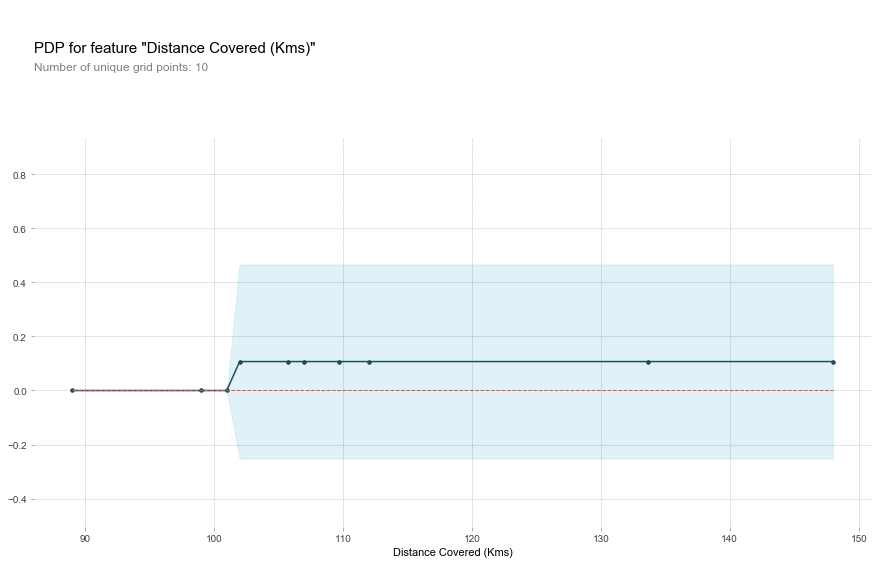

In [18]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

#create the data to plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features = feature_names, feature = 'Goal Scored')
#plot the data
#pdp.pdp_plot(pdp_goals, 'Goal Scored')
#the y axis is interpreted as change in the prediction from what it would be predicted at the baseline or leftmost alue
#the blue shaded area indicates the level of confidence


feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model = tree_model, dataset = val_X, model_features = feature_names, feature=feature_to_plot)
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

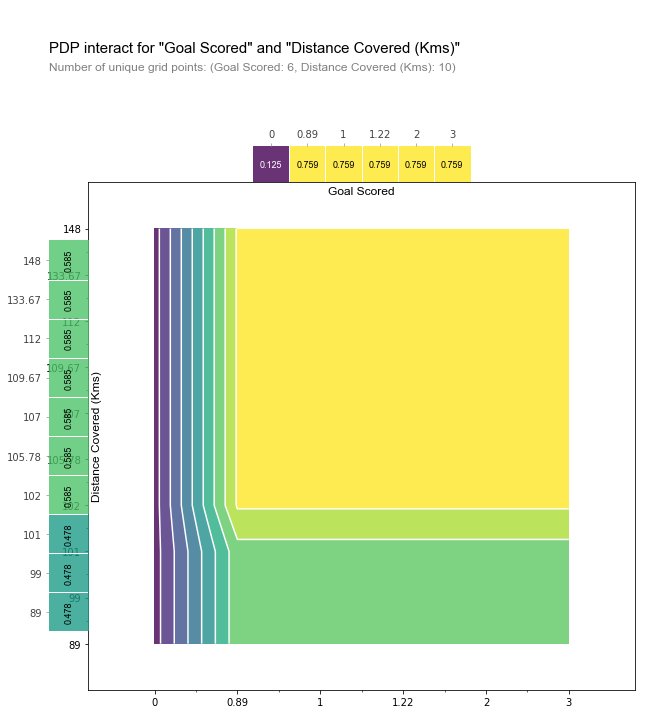

In [21]:
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)
#here we'll use pdp_interact_plot rather than pdp_isolate
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour', plot_pdp=True)
plot.show()
